Data Cleaning And Feature extraction

In [1]:
import pandas as pd


netflix_data=pd.read_csv("netflix_content_2023.csv") 
print(netflix_data)

                                              Title Available Globally?  \
0                         The Night Agent: Season 1                 Yes   
1                         Ginny & Georgia: Season 2                 Yes   
2                The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   
3                               Wednesday: Season 1                 Yes   
4               Queen Charlotte: A Bridgerton Story                 Yes   
...                                             ...                 ...   
24807            We Are Black and British: Season 1                  No   
24808             Whitney Cummings: Can I Touch It?                 Yes   
24809                       Whitney Cummings: Jokes                  No   
24810  Whose Vote Counts, Explained: Limited Series                 Yes   
24811   Zach Galifianakis: Live at the Purple Onion                  No   

      Release Date  Hours Viewed Language Indicator Content Type  
0       2023-03-23  81,21,00,000

In [2]:
netflix_data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Title                24812 non-null  bool 
 1   Available Globally?  24812 non-null  bool 
 2   Release Date         24812 non-null  bool 
 3   Hours Viewed         24812 non-null  bool 
 4   Language Indicator   24812 non-null  bool 
 5   Content Type         24812 non-null  bool 
dtypes: bool(6)
memory usage: 145.5 KB


In [3]:
netflix_data.describe()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
count,24812,24812,8166,24812,24812,24812
unique,19158,2,1783,889,6,2
top,The Night Agent: Season 1,No,2020-03-20,"1,00,000",English,Movie
freq,2,17162,28,4046,17268,14104


In [4]:
#Cleaning Hours viewed:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].str.replace(',', '').astype(int)

In [5]:
#Converting Release date:
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'], errors='coerce')

In [6]:
#Extract 'Release Month' and 'Release Season':
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

In [7]:
#Categorizing the release date in terms of season:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

In [8]:
#Engagement Ratio:
today = pd.to_datetime('2023-12-31')  # Assume today is end of 2023
netflix_data['Days Since Release'] = (today - netflix_data['Release Date']).dt.days
netflix_data['Engagement Ratio'] = netflix_data['Hours Viewed'] / netflix_data['Days Since Release']

In [9]:
#Displaying new data after cleaning:
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Release Season,Days Since Release,Engagement Ratio
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show,3.0,Spring,283.0,2.869611e+06
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show,1.0,Winter,360.0,1.847500e+06
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show,12.0,Winter,366.0,1.701639e+06
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show,11.0,Fall,403.0,1.259801e+06
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie,5.0,Spring,241.0,2.087137e+06


In [10]:
# Display cleaned data and new features
netflix_data[['Title', 'Release Date', 'Hours Viewed', 'Release Month', 'Release Season', 'Engagement Ratio']].head()

,Title,Release Date,Hours Viewed,Release Month,Release Season,Engagement Ratio
0,The Night Agent: Season 1,2023-03-23,812100000,3.0,Spring,2.869611e+06
1,Ginny & Georgia: Season 2,2023-01-05,665100000,1.0,Winter,1.847500e+06
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000,12.0,Winter,1.701639e+06
3,Wednesday: Season 1,2022-11-23,507700000,11.0,Fall,1.259801e+06
4,Queen Charlotte: A Bridgerton Story,2023-05-04,503000000,5.0,Spring,2.087137e+06


1. Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Average Viewership by Content Type'}, xlabel='Content Type'>

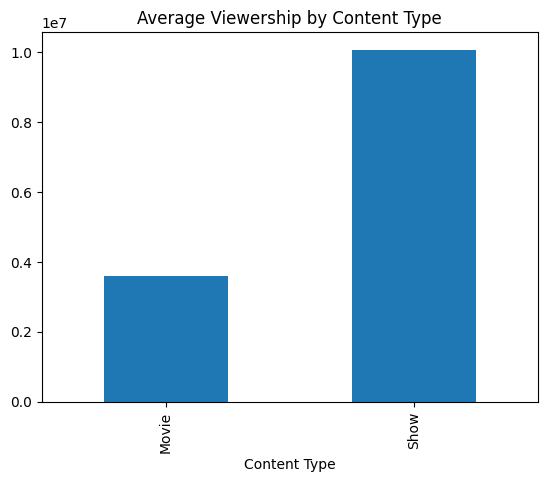

In [17]:
netflix_data.groupby('Content Type')['Hours Viewed'].mean().plot(kind='bar', title='Average Viewership by Content Type')


<Axes: title={'center': 'Average Viewership by Season'}, xlabel='Release Season'>

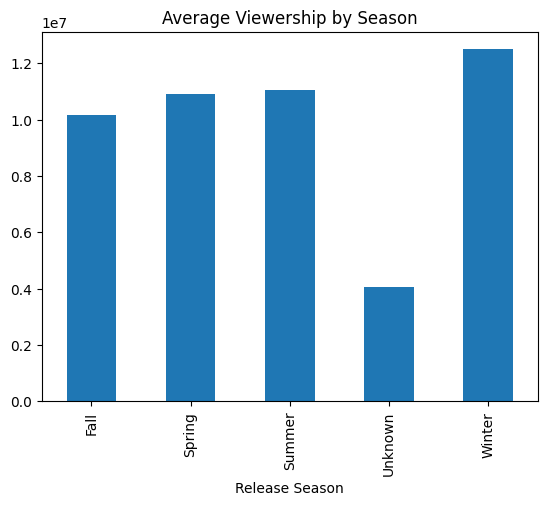

In [16]:
netflix_data.groupby('Release Season')['Hours Viewed'].mean().plot(kind='bar', title='Average Viewership by Season')

<Axes: title={'center': 'Top 5 Languages by Viewership'}, xlabel='Language Indicator'>

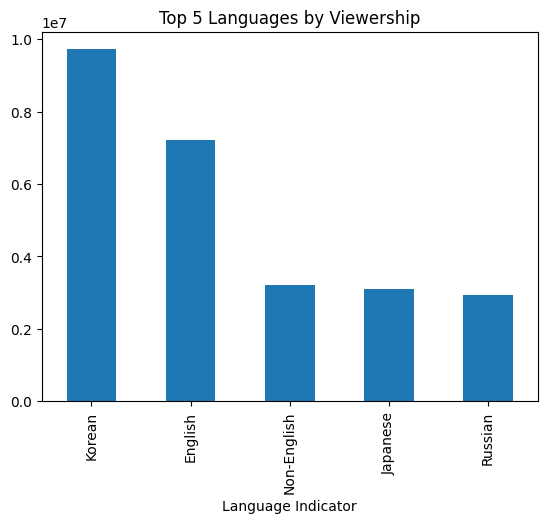

In [19]:
top_languages = netflix_data.groupby('Language Indicator')['Hours Viewed'].mean().nlargest(5)
top_languages.plot(kind='bar', title='Top 5 Languages by Viewership')


2. Correlation Analysis

In [21]:
# Select only numeric columns from the DataFrame
numeric_data = netflix_data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                    Hours Viewed  Release Month  Days Since Release  \
Hours Viewed            1.000000      -0.007866           -0.197710   
Release Month          -0.007866       1.000000           -0.046626   
Days Since Release     -0.197710      -0.046626            1.000000   
Engagement Ratio        0.353338       0.052714           -0.125983   

                    Engagement Ratio  
Hours Viewed                0.353338  
Release Month               0.052714  
Days Since Release         -0.125983  
Engagement Ratio            1.000000  


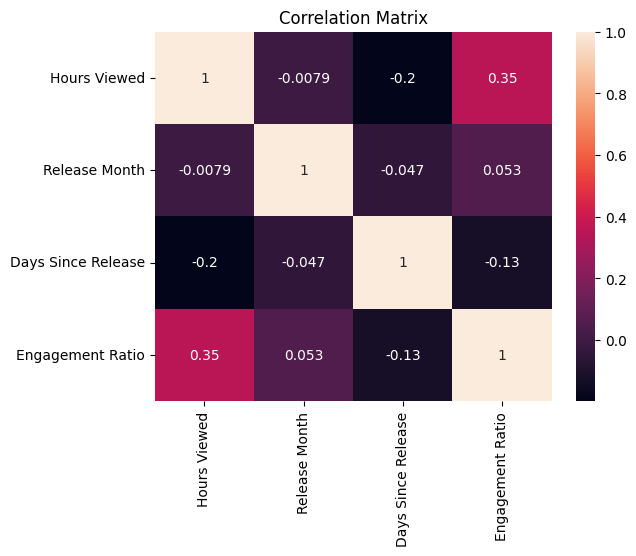

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

3. Hypothesis Testing

In [23]:
#Test 1(T=0): Does content type (Show vs. Movie) significantly affect viewership?
from scipy import stats
show_viewership = netflix_data[netflix_data['Content Type'] == 'Show']['Hours Viewed']
movie_viewership = netflix_data[netflix_data['Content Type'] == 'Movie']['Hours Viewed']
t_stat, p_value = stats.ttest_ind(show_viewership, movie_viewership)
print(f'T-test results: t-statistic={t_stat}, p-value={p_value}')

T-test results: t-statistic=24.732035693431325, p-value=1.9995604783112948e-133


In [24]:
#Test 2(T=1): Does release season significantly affect viewership?
anova_results = stats.f_oneway(netflix_data[netflix_data['Release Season'] == 'Winter']['Hours Viewed'],
                               netflix_data[netflix_data['Release Season'] == 'Spring']['Hours Viewed'],
                               netflix_data[netflix_data['Release Season'] == 'Summer']['Hours Viewed'],
                               netflix_data[netflix_data['Release Season'] == 'Fall']['Hours Viewed'])
print(f'ANOVA results: F-statistic={anova_results.statistic}, p-value={anova_results.pvalue}')

ANOVA results: F-statistic=1.9704639874201546, p-value=0.11609145642032208


4. Segmentation & Clustering (Optional)

       Hours Viewed  Release Month  Engagement Ratio
count  8.165000e+03    8165.000000      8.165000e+03
mean   1.112381e+07       6.798775      4.706888e+04
std    3.147137e+07       3.461632      5.039553e+05
min    1.000000e+05       1.000000      2.693966e+01
25%    9.000000e+05       4.000000      6.527415e+02
50%    3.000000e+06       7.000000      2.540984e+03
75%    9.200000e+06      10.000000      1.004800e+04
max    8.121000e+08      12.000000      3.715000e+07


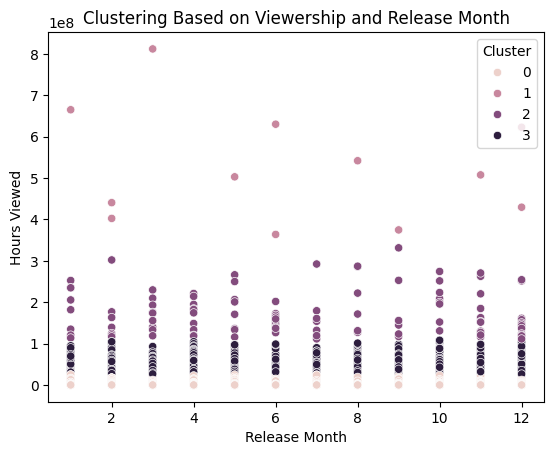

In [27]:
import numpy as np
# Check for infinity or very large values and replace them with NaN
netflix_data_cleaned = netflix_data_cleaned.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN (including those with replaced infinity values)
netflix_data_cleaned = netflix_data_cleaned.dropna(subset=['Hours Viewed', 'Release Month', 'Engagement Ratio'])

# Verify that there are no invalid values in your features
print(netflix_data_cleaned[['Hours Viewed', 'Release Month', 'Engagement Ratio']].describe())

# Apply KMeans clustering
features = netflix_data_cleaned[['Hours Viewed', 'Release Month', 'Engagement Ratio']]
kmeans = KMeans(n_clusters=4)
netflix_data_cleaned['Cluster'] = kmeans.fit_predict(features)

# Plot the clusters
sns.scatterplot(data=netflix_data_cleaned, x='Release Month', y='Hours Viewed', hue='Cluster')
plt.title('Clustering Based on Viewership and Release Month')
plt.show()